<a href="https://colab.research.google.com/github/NBackshall/machine-learning-learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
Installing dependencies.

In [180]:
# Execute this code block to install dependencies when running on colab
try:
    import torch
except:
    from os.path import exists
    from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
    platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
    cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
    accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

    !pip install -q http://download.pytorch.org/whl/{accelerator}/torch-1.0.0-{platform}-linux_x86_64.whl torchvision

import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6), dpi=80)

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

Create a dataset.

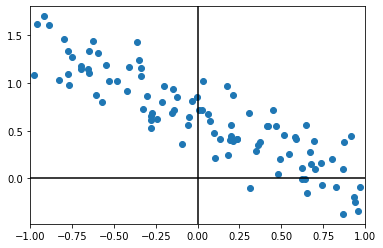

In [196]:
# Generate some data points on a straight line perturbed with Gaussian noise
N = 100 # number of points
theta_true = (-2 - 2) * torch.rand(2, 1) + 2 # true parameters of the line

X = -2 * torch.rand(N, 2) + 1
X[:, 1] = 1.0
y = X @ theta_true + 0.2 * torch.randn(N, 1) # like in numpy, '@' represents matrix multiplication and A@B is equivalent to torch.mm(A, B) 

plt.scatter(X[:,0], y)
plt.xlim([-1, 1])
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

## Gradient based Linear Regression

Fundamentally, with linear regression we are trying to find a solution vector, $mathbf{w}$ that minimises $f(\mathbf{w}) = 0.5\|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2$. 

Let's use gradient descent: $\mathbf{w} \gets \mathbf{w} - \alpha f'(\mathbf{w})$. (_Interesting aside_: SVD (and thus the pseudoinverse) can also be solved using gradient methods - in fact this becomes the only practical way for really large matrices.).

$f(\mathbf{w})=\frac{1}{2}\|\mathbf{X}\mathbf{w} - \mathbf{y}\|_2^2$

$f(\mathbf{w})=\frac{1}{2}(\mathbf{X}\mathbf{w} - \mathbf{y})^T(\mathbf{X}\mathbf{w} - \mathbf{y})$

$f(\mathbf{w})=\frac{1}{2}(\mathbf{X}^T\mathbf{X}\mathbf{w}^2 - 2\mathbf{X}^T\mathbf{y}\mathbf{w} + \mathbf{y}^T\mathbf{y})$

$f'(\mathbf{w})=\mathbf{X}^T\mathbf{X}\mathbf{w} - \mathbf{X}^T\mathbf{y}$

$f'(\mathbf{w})=\mathbf{X}^T(\mathbf{X}\mathbf{w} - \mathbf{y})$

In [197]:
def calculate_gradient(w, X, y):
  return X.T @ (X @ w - y)

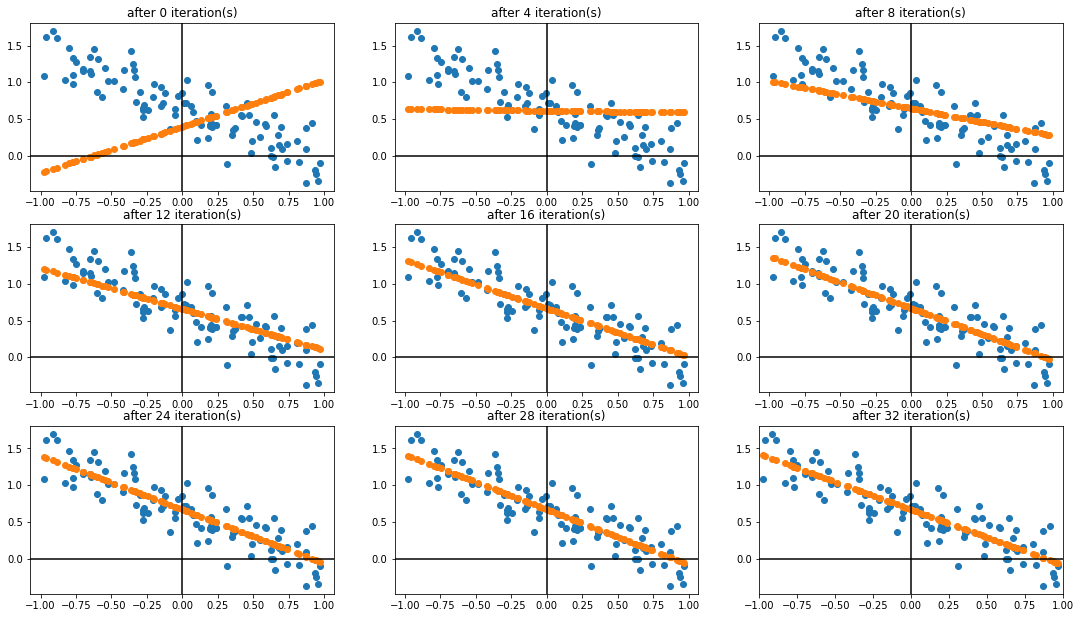

In [211]:
alpha = 0.005
w = torch.rand(2,1)

fig, axs = plt.subplots(3, 3)
fig.set_size_inches(18.5, 10.5)

epoch = 4
counter = 0

for i in range(8):
  i2 = i % 3
  i1 = ((i // 3) % 3)
  axs[i1, i2].scatter(X[:,0], y)
  axs[i1, i2].scatter(X[:,0], X @ w)
  plt.xlim([-1, 1])
  axs[i1, i2].axhline(0, color='black')
  axs[i1, i2].axvline(0, color='black')
  axs[i1, i2].set_title("after {} iteration(s)".format(i*(epoch)))
  for j in range(epoch):
    w = w - (calculate_gradient(w,X,y) * alpha)
    counter += 1

axs[2, 2].scatter(X[:,0], y)
axs[2, 2].scatter(X[:,0], X @ w)
plt.xlim([-1, 1])
axs[2, 2].axhline(0, color='black')
axs[2, 2].axvline(0, color='black')
axs[2, 2].set_title("after {} iteration(s)".format(8*epoch))

plt.show()